# Importing the dataset

In [31]:
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
data=pd.read_csv("udemy_courses.csv")
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


# 1. Get the Information about the Dataset

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [34]:
#In order to change the dtype of published_timestamp to datetime format
#Use the parse_dates arguments of pandas 
data=pd.read_csv("udemy_courses.csv",parse_dates=['published_timestamp'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
dtypes: bool(1), datetime

# 2. Display the shape of the given dataset 

In [35]:
data.shape

(3678, 12)

In [36]:
print("No. of Rows=",data.shape[0])
print("No. of Columns=",data.shape[1])

No. of Rows= 3678
No. of Columns= 12


# 3. How many courses are there in the dataset?

In [37]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [38]:
data['course_title'].value_counts()

course_title
Acoustic Blues Guitar Lessons                           3
Creating an animated greeting card via Google Slides    3
CFA Level 2- Quantitative Methods                       2
Essentials of money value: Get a financial Life !       2
Drum Lessons For Beginners                              2
                                                       ..
Drawing Perspective For Beginners                       1
Adobe InDesign CC Advanced                              1
Intro to Photoshop for Merch by Amazon                  1
Photoshop - Creación de Efectos 2                       1
Using MODX CMS to Build Websites: A Beginner's Guide    1
Name: count, Length: 3663, dtype: int64

In [39]:
len(data['course_title'].value_counts()) #Answer

3663

# 4. What are the unique course levels available in the dataset?

In [11]:
data['level'].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

# 5. What is the average price of the courses based on Subject?

In [12]:
data.groupby('subject')['price'].mean()

subject
Business Finance       68.552301
Graphic Design         57.827529
Musical Instruments    49.558824
Web Development        77.033333
Name: price, dtype: float64

# 6. How many courses are paid, and how many are free?

In [27]:
data['is_paid'].value_counts()   # True indicates paid , False indicates Free

is_paid
True     3368
False     310
Name: count, dtype: int64

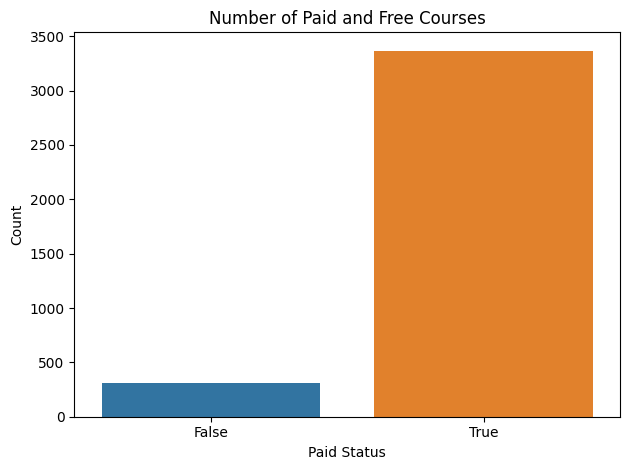

In [130]:
#Visualization: Countplot using seaborn
sns.countplot(data=data, x='is_paid')
plt.title('Number of Paid and Free Courses')
plt.xlabel('Paid Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 7. Which subject has the highest number of courses?

In [70]:
data['subject'].value_counts()

subject
Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: count, dtype: int64

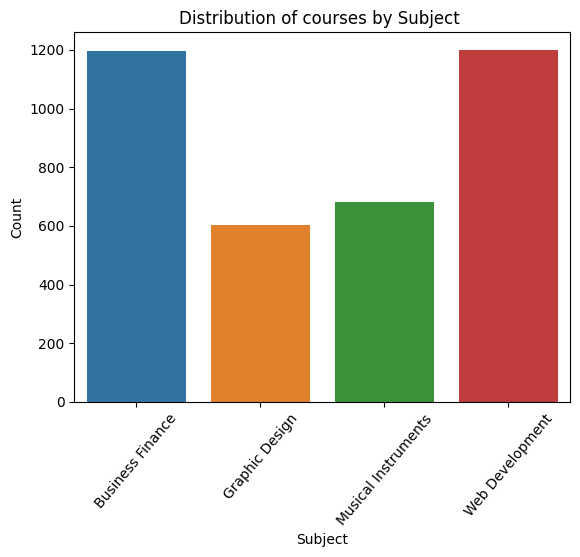

In [71]:
#Visulization: Countplot using seaborn 
sns.countplot(data=data, x='subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.title('Distribution of courses by Subject ')
plt.xticks(rotation=50)
plt.show()

# 8. What is the maximum number of subscribers for a course?

In [72]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [73]:
data[data['num_subscribers'].max()==data['num_subscribers']]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14 07:03:41+00:00,Web Development


In [74]:
data[data['num_subscribers'].max()==data['num_subscribers']]['course_title']   #Answer

2827    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

# 9. How many courses have more than 10,000 subscribers?

In [75]:
data[data['num_subscribers']>100000]['course_title']     #With Course_title

1896                Free Beginner Electric Guitar Lessons
2783    Build Your First Website in 1 Week with HTML5 ...
2827                 Learn HTML5 Programming From Scratch
3032                       Coding for Entrepreneurs Basic
3230                           The Web Developer Bootcamp
3232                The Complete Web Developer Course 2.0
Name: course_title, dtype: object

In [76]:
len(data[data['num_subscribers']>100000])     # Answer

6

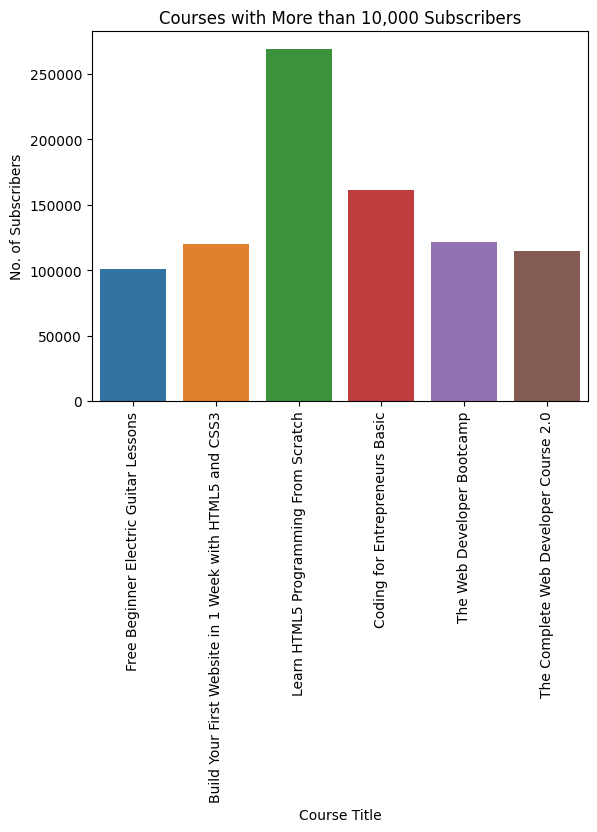

In [77]:
#Visulization: barplot using seaborn
data1=data[data['num_subscribers']>100000]
sns.barplot(data=data1, x='course_title', y='num_subscribers')
plt.title('Courses with More than 10,000 Subscribers')
plt.xlabel('Course Title')
plt.ylabel('No. of Subscribers')
plt.xticks(rotation=90)
plt.show()

# 10. What is the average number of reviews for all courses?

In [78]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [79]:
data['num_reviews'].mean()

156.25910821098424

# 11. Which course has the highest number of lectures?

In [80]:
data[data['num_lectures'].max()==data['num_lectures']]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2707,79154,Back to School Web Development and Programming...,https://www.udemy.com/back-to-school-web-devel...,True,200,18170,117,779,Beginner Level,44.5,2013-08-19 14:53:00+00:00,Web Development


In [81]:
data[data['num_lectures'].max()==data['num_lectures']]['course_title']

2707    Back to School Web Development and Programming...
Name: course_title, dtype: object

# 12. What is the average number of lectures across all courses?

In [82]:
data['num_lectures'].mean()

40.108754758020666

# 13. What is the average content duration of courses in hours?

In [83]:
#In the Given Dataset the content duration is already in the form of hrs so we can just take average of it 
#Suppose if the content duration is not in the form of hrs we need to convert it by dividing it by 60 

In [163]:
data['content_duration'].mean()

4.094516947616459

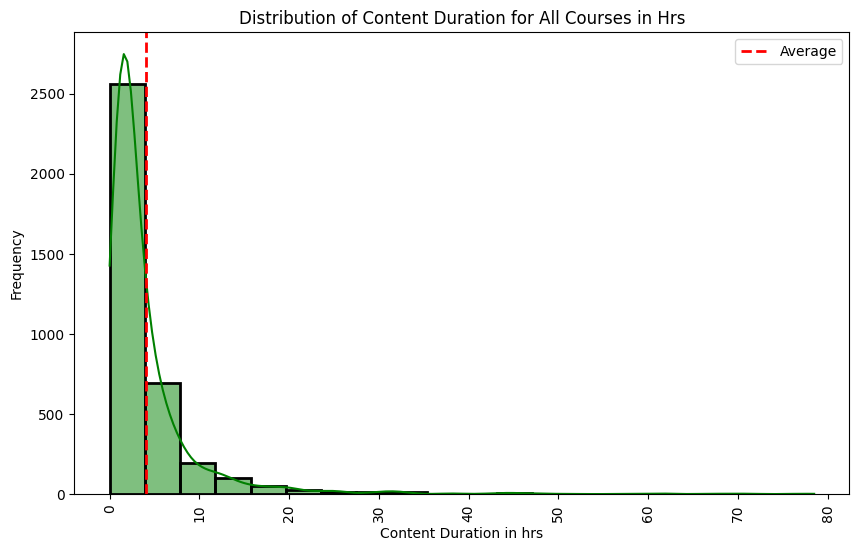

In [194]:
#Visualization: Histogram by using Seaborn
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='content_duration',bins=20,edgecolor='black',lw=2,color='green',kde=True)
plt.axvline(data['content_duration'].mean(),color='red',ls='dashed',lw=2,label='Average')
plt.title('Distribution of Content Duration for All Courses in Hrs')
plt.xlabel('Content Duration in hrs')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(rotation=90)
plt.show()

# 14. How many courses were published in each year?  (Based on the  'published_timestamp')

In [85]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [86]:
data['Year']=data['published_timestamp'].dt.year
data.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017


In [87]:
data.groupby('Year')['course_title'].value_counts()  

Year  course_title                                                
2011  Become a Certified Web Developer                                1
      Become a Web Developer from Scratch                             1
      HTML Tutorial: HTML & CSS for Beginners                         1
      Javascript for Beginners                                        1
      Learn jQuery: An In-depth Course For Beginners                  1
                                                                     ..
2017  Build a Complete Registration and Login System using PHP MVC    1
      Build a Real-world App with ASP.NET Core and Angular 2 (4+)     1
      Build a Single Page Application with jQuery & AJAX              1
      Build a complete Fiverr clone with Node + Algolia + Paypal      1
      캔바(Canva)로 SNS 콘텐츠 만들기                                          1
Name: count, Length: 3669, dtype: int64

In [88]:
data['Year'].value_counts() #Answer

Year
2016    1206
2015    1014
2017     715
2014     491
2013     202
2012      45
2011       5
Name: count, dtype: int64

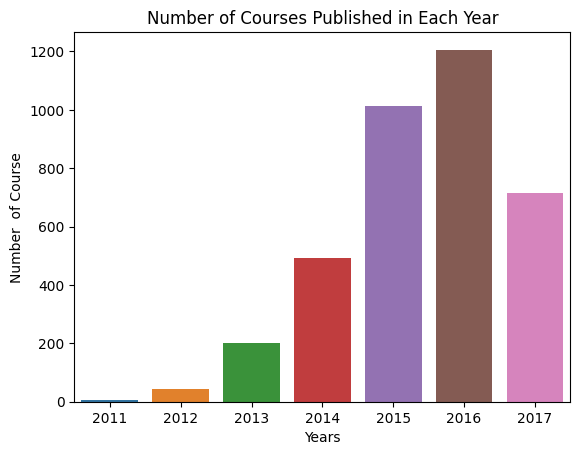

In [89]:
#Visualization: countplot using seaborn
sns.countplot(data=data, x='Year')
plt.title('Number of Courses Published in Each Year')
plt.xlabel('Years')
plt.ylabel('Number  of Course')
plt.show()

# 15. What is the average number of subscribers for courses in each subject?

In [90]:
data.groupby('subject')['num_subscribers'].mean()

subject
Business Finance       1563.774895
Graphic Design         1763.097844
Musical Instruments    1245.130882
Web Development        6650.476667
Name: num_subscribers, dtype: float64

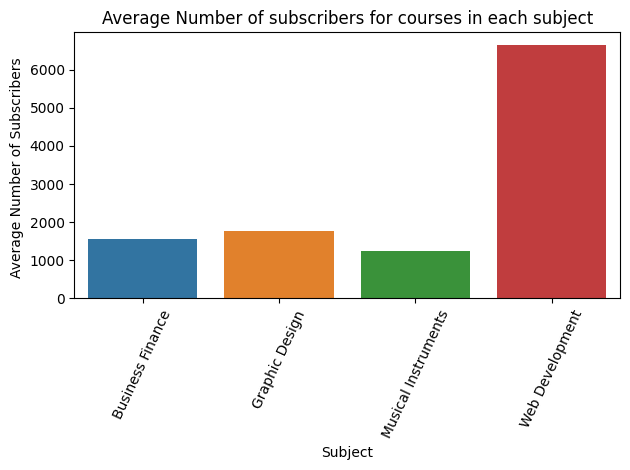

In [106]:
#Visualization: Barplot using seaborn
avg_sub_by_sub=data.groupby('subject')['num_subscribers'].mean()
sns.barplot(data=data, x=avg_sub_by_sub.index,y=avg_sub_by_sub.values)
plt.title('Average Number of subscribers for courses in each subject')
plt.xlabel('Subject')
plt.ylabel('Average Number of Subscribers ')
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

# 16.  How does the average number of reviews vary for paid and free courses?

In [107]:
data.groupby('is_paid')['num_reviews'].mean()

is_paid
False    425.929032
True     131.437945
Name: num_reviews, dtype: float64

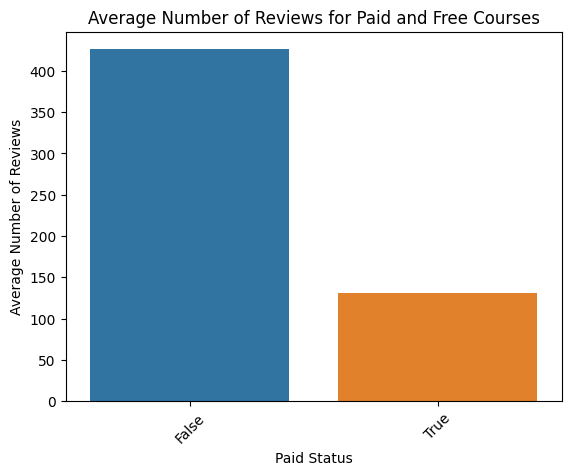

In [115]:
#Visualization: Barplot using seaborn
sns.barplot(data=data, x='is_paid',y='num_reviews',errorbar=None)
plt.title('Average Number of Reviews for Paid and Free Courses')
plt.xlabel('Paid Status')
plt.ylabel('Average Number of Reviews')
plt.xticks(rotation=45)
plt.show()

# 17. What is the median price of the courses?

In [116]:
data['price'].median()   #Mid Value

45.0

# 18. Which course has the highest price?

In [118]:
highest_price=data[data['price'].max()==data['price']]
highest_price

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,2016
9,1167710,The Only Investment Strategy You Need For Your...,https://www.udemy.com/the-only-investment-stra...,True,200,827,14,15,All Levels,1.0,2017-04-18 18:13:32+00:00,Business Finance,2017
10,592338,Forex Trading Secrets of the Pros With Amazon'...,https://www.udemy.com/trading-with-amazons-aws...,True,200,4284,93,76,All Levels,5.0,2015-09-11 16:47:02+00:00,Business Finance,2015
11,975046,Trading Options With Money Flow,https://www.udemy.com/trading-options-using-mo...,True,200,1380,42,17,All Levels,1.0,2016-10-18 22:52:31+00:00,Business Finance,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3592,976854,Spring 4 Mastercourse: Covers Annotation & XML...,https://www.udemy.com/java-spring-framework/,True,200,1353,53,320,Intermediate Level,23.5,2016-11-01 22:08:04+00:00,Web Development,2016
3620,1227578,Learning Path: The Road to Elasticsearch,https://www.udemy.com/learning-path-the-road-t...,True,200,50,5,60,Beginner Level,5.0,2017-05-29 17:56:24+00:00,Web Development,2017
3642,709324,Learn Web Development by Creating a Social Net...,https://www.udemy.com/meteor-tutorial/,True,200,442,48,80,Beginner Level,6.5,2015-12-30 16:53:44+00:00,Web Development,2015
3652,919354,Learn Bootstrap 4 The Most Popular HTML5 CSS3 ...,https://www.udemy.com/learn-bootstrap-4-the-mo...,True,200,279,37,119,All Levels,10.0,2017-04-25 00:57:35+00:00,Web Development,2017


In [119]:
highest_price_sort=highest_price.sort_values(by='num_subscribers',ascending=False)['course_title']

highest_price_sort.iloc[0] #It contain highest price as well as Subscribers

'The Web Developer Bootcamp'

# 19. How many courses are there for each course level?

In [120]:
data['level'].value_counts()

level
All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

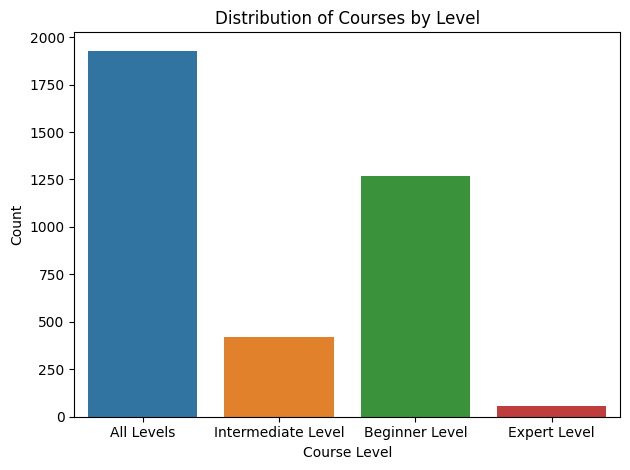

In [122]:
#Visualization: Countplot using Seaborn
sns.countplot(data=data, x='level')
plt.title('Distribution of Courses by Level')
plt.xlabel('Course Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 20. What is the average number of subscribers for courses at each level?

In [123]:
data.groupby('level')['num_subscribers'].mean()

level
All Levels            3584.798341
Beginner Level        3190.427559
Expert Level           865.448276
Intermediate Level    1762.482185
Name: num_subscribers, dtype: float64

# 21. How many courses have a title containing the word "Python"?

In [128]:
data[data['course_title'].str.contains('Python',case=False)]['course_title']

14       Python Algo Trading: Sentiment Trading with News
30      Python Algo Stock Trading: Automate Your Trading!
41      Python for Finance: Investment Fundamentals & ...
147            Python Algo Trading: FX Trading with Oanda
334                  Stock Technical Analysis with Python
536                        Python for Trading & Investing
762             Quantitative Trading Analysis with Python
863             Investment Portfolio Analysis with Python
1682    Learn to code in Python and learn Adobe Photos...
2497                          Web Programming with Python
2528          Learn Python and Django: Payment Processing
2553    The Complete Ethical Hacking Course 2.0: Pytho...
2570    Coding for Entrepreneurs: Learn Python, Django...
2681    Python for Beginners: Python Programming Langu...
2960                        Projects in Django and Python
3133          Web Scraping with Python, Ruby & import. io
3138    Complete Python Web Course: Build 8 Python Web...
3160      Prof

In [125]:
len(data[data['course_title'].str.contains('Python',case=False)]['course_title'])  #Answer

29

# 22. What is the earliest and latest published timestamp in the dataset?

In [139]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'Year'],
      dtype='object')

In [144]:
print("The Earliest Published Timestamp in the dataset is ",data['published_timestamp'].min())
print("The Latest Published Timestamp in the dataset is ",data['published_timestamp'].max())

The Earliest Published Timestamp in the dataset is  2011-07-09 05:43:31+00:00
The Latest Published Timestamp in the dataset is  2017-07-06 21:46:30+00:00
